In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import ttest_ind
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as mae 
from scipy import stats
import seaborn as sns

In [2]:
# Set some directories. Here we use absolute directories. 
cwd = 'c:\\Users\\m1865\\Desktop\\Ticino'
cwd_Field = cwd + '\\FieldData'
cwd_Field_DataMerged = cwd_Field + '\\Field Dataset Merged'
cwd_Field_DataMerged_CSV_Indices = cwd_Field_DataMerged + "\\CSV Biodiversity Indices"
cwd_PRISMA = cwd + "\\PRISMA Raster Raw\\Merged"
cwd_PRISMA_Result = cwd + "\\ResultsPRISMA"
cwd_Field_Data1 = cwd_Field + '\\Field Dataset 1'
cwd_Field_Data1_CSV = cwd_Field_Data1 + "\\CSV"

In [3]:
# Get the name of all the rasters in our folder
raster_Names = []
for item in [name.split('.')[0] for name in os.listdir(cwd_PRISMA)]:
    item = item + "_StackedIndices_20VI"
    if item not in raster_Names:
        raster_Names.append(item)
raster_Names

['PRS_L2D_STD_20220611_20220710_NS_mosaic_crop_smooth_v2i_StackedIndices_20VI',
 'PRS_L2D_STD_20220906_20220911_NS_mosaic_crop_smooth_v2i_StackedIndices_20VI',
 'PRS_L2D_STD_20220906_20220911_NS_mosaic_crop_smooth_v2i_new_StackedIndices_20VI']

In [4]:
df_Raster_6 = pd.read_csv(cwd_PRISMA_Result + "\\" + raster_Names[0] + "\\AlphaDiversity150m.csv", sep = '\t')
df_Raster_9 = pd.read_csv(cwd_PRISMA_Result + "\\" + raster_Names[2] + "\\AlphaDiversity150m.csv", sep = '\t')
df_Raster_6.head()

,Plot,Species_Richness,Fisher,Shannon,Simpson
0,FOR01,3.666667,0,0.872456,0.491733
1,FOR02,3.666667,0,0.934091,0.525463
2,FOR03,3.666667,0,1.054806,0.582011
3,FOR04,2.000000,0,0.440588,0.285867
4,FOR05,2.000000,0,0.614485,0.426304


In [5]:
df_Raster_Merge = pd.merge(df_Raster_6[['Plot','Species_Richness','Shannon','Simpson']],df_Raster_9[['Plot','Species_Richness','Shannon','Simpson']], on = 'Plot', suffixes= [' June', ' Sep'])
df_Raster_Merge.head()

,Plot,Species_Richness June,Shannon June,Simpson June,Species_Richness Sep,Shannon Sep,Simpson Sep
0,FOR01,3.666667,0.872456,0.491733,5.333333,1.327350,0.661333
1,FOR02,3.666667,0.934091,0.525463,2.000000,0.582449,0.396991
2,FOR03,3.666667,1.054806,0.582011,4.666667,1.165272,0.613757
3,FOR04,2.000000,0.440588,0.285867,3.000000,0.863459,0.513067
4,FOR05,2.000000,0.614485,0.426304,2.000000,0.346367,0.196523


In [6]:
df_Raster_Merge.columns = ['Plot','Raster Species Richness June','Raster Shannon June','Raster Simpson June','Raster Species Richness Sep','Raster Shannon Sep','Raster Simpson Sep']
df_Raster_Merge.head()

,Plot,Raster Species Richness June,Raster Shannon June,Raster Simpson June,Raster Species Richness Sep,Raster Shannon Sep,Raster Simpson Sep
0,FOR01,3.666667,0.872456,0.491733,5.333333,1.327350,0.661333
1,FOR02,3.666667,0.934091,0.525463,2.000000,0.582449,0.396991
2,FOR03,3.666667,1.054806,0.582011,4.666667,1.165272,0.613757
3,FOR04,2.000000,0.440588,0.285867,3.000000,0.863459,0.513067
4,FOR05,2.000000,0.614485,0.426304,2.000000,0.346367,0.196523


In [7]:
df_Association = pd.read_csv(cwd_Field_Data1_CSV + "\\FieldData1 Valid Association.csv")
df_Association.head()

,Plot,Association
0,FOR01,Oak_hornbeam_humid
1,FOR02,Prunus
2,FOR03,Prunus
3,FOR04,Oak_open_canopy
4,FOR05,Oak_open_canopy


In [8]:
df_Raster_Merge_1 = pd.merge(df_Raster_Merge.iloc[0:63,:],df_Association,on='Plot')
df_Raster_Merge_1.tail()

,Plot,Raster Species Richness June,Raster Shannon June,Raster Simpson June,Raster Species Richness Sep,Raster Shannon Sep,Raster Simpson Sep,Association
58,FOR78,3.333333,0.858357,0.507733,3.333333,0.930300,0.557867,Prunus
59,FOR79,3.333333,0.952244,0.554667,4.666667,1.032519,0.517333,Mixed deciduous
60,FOR80,3.000000,0.709776,0.396800,1.666667,0.148905,0.074667,Mixed deciduous
61,FOR81,2.666667,0.580918,0.342400,4.666667,1.368768,0.722133,Mixed deciduous
62,FOR82,2.666667,0.434512,0.232533,4.666667,1.025898,0.531200,Mixed deciduous


## Species Richness

In [9]:
df_Field_Richness = pd.read_csv(cwd_Field_DataMerged_CSV_Indices + "\\FieldDataMerged Valid SpeciesRichness.csv")
df_Field_Richness.head()

,Plot,Field Species Richness
0,FOR01,5
1,FOR02,7
2,FOR03,4
3,FOR04,2
4,FOR05,1


In [10]:
df_Field_Richness_1 = df_Field_Richness.copy().iloc[0:63,:]
df_Field_Richness_1.tail()

,Plot,Field Species Richness
58,FOR78,2
59,FOR79,4
60,FOR80,3
61,FOR81,4
62,FOR82,4


In [11]:
df_Richness_1 = pd.merge(df_Field_Richness_1,df_Raster_Merge_1[['Plot','Association','Raster Species Richness June','Raster Species Richness Sep']],on = 'Plot')
df_Richness_1.head()

,Plot,Field Species Richness,Association,Raster Species Richness June,Raster Species Richness Sep
0,FOR01,5,Oak_hornbeam_humid,3.666667,5.333333
1,FOR02,7,Prunus,3.666667,2.000000
2,FOR03,4,Prunus,3.666667,4.666667
3,FOR04,2,Oak_open_canopy,2.000000,3.000000
4,FOR05,1,Oak_open_canopy,2.000000,2.000000


In [12]:
df_Richness_1.describe()

,Field Species Richness,Raster Species Richness June,Raster Species Richness Sep
count,63.000000,63.000000,63.000000
mean,3.507937,3.343915,2.835979
std,1.865415,1.215150,1.314208
min,1.000000,1.000000,1.000000
25%,2.000000,2.666667,1.833333
50%,3.000000,3.333333,2.666667
75%,4.000000,4.000000,3.666667
max,8.000000,6.000000,5.666667


In [13]:
df_Richness_1_Asso = df_Richness_1.copy().sort_values('Association')
df_Richness_1_Asso

,Plot,Field Species Richness,Association,Raster Species Richness June,Raster Species Richness Sep
20,FOR21,4,Alder,2.000000,1.000000
19,FOR20,3,Alder,3.333333,1.000000
35,FOR55,2,Alder,2.000000,3.000000
7,FOR08,4,Alder,3.333333,2.333333
36,FOR56,2,Alder,2.000000,3.000000
...,...,...,...,...,...
24,FOR25,1,Pine,2.666667,2.000000
30,FOR31,2,Pine,2.666667,2.666667
58,FOR78,2,Prunus,3.333333,3.333333
2,FOR03,4,Prunus,3.666667,4.666667


In [14]:
df_Richness_1_Asso_NoZero = df_Richness_1_Asso.copy()
df_Richness_1_Asso_NoZero = df_Richness_1_Asso_NoZero[df_Richness_1_Asso_NoZero['Raster Species Richness June'] != 0]
df_Richness_1_Asso_NoZero = df_Richness_1_Asso_NoZero[df_Richness_1_Asso_NoZero['Raster Species Richness Sep'] != 0]
df_Richness_1_Asso_NoZero.describe()

,Field Species Richness,Raster Species Richness June,Raster Species Richness Sep
count,63.000000,63.000000,63.000000
mean,3.507937,3.343915,2.835979
std,1.865415,1.215150,1.314208
min,1.000000,1.000000,1.000000
25%,2.000000,2.666667,1.833333
50%,3.000000,3.333333,2.666667
75%,4.000000,4.000000,3.666667
max,8.000000,6.000000,5.666667


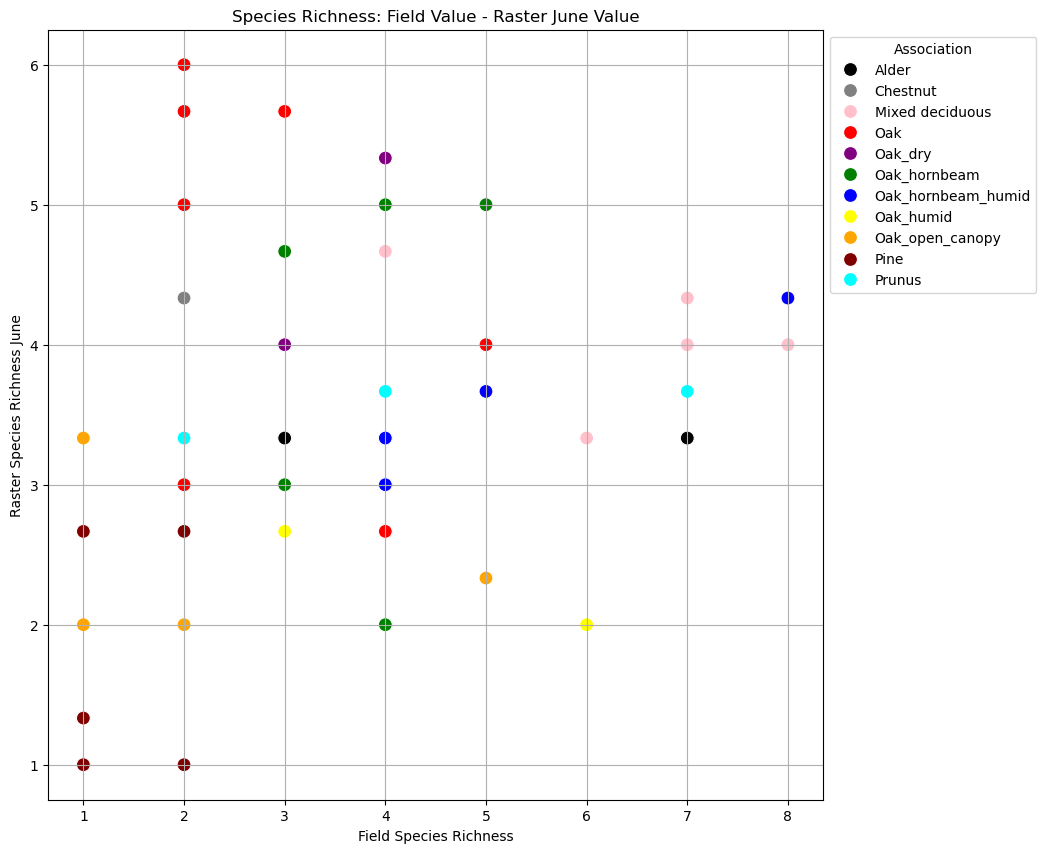

In [15]:
fig, ax1 = plt.subplots(figsize = (10,10))
sns.scatterplot(x = 'Field Species Richness',y = 'Raster Species Richness June', data = df_Richness_1_Asso, hue = 'Association', 
                palette=['Black','Grey','Pink','Red','Purple','Green','Blue','Yellow','Orange','Maroon','Aqua'],
                s=100, ax = ax1)
sns.move_legend(ax1,'upper left',bbox_to_anchor= (1,1))
ax1.grid()
plt.title('Species Richness: Field Value - Raster June Value')
plt.show()

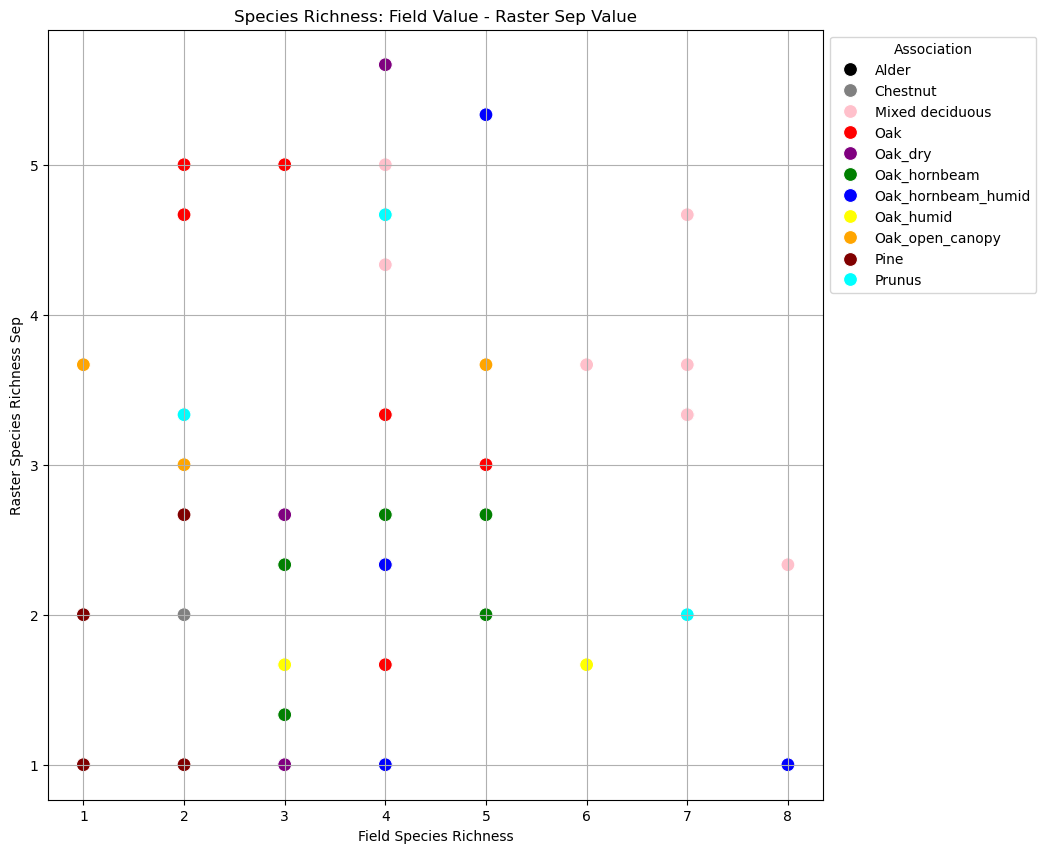

In [16]:
fig, ax1 = plt.subplots(figsize = (10,10))
sns.scatterplot(x = 'Field Species Richness',y = 'Raster Species Richness Sep', data = df_Richness_1_Asso, hue = 'Association', 
                palette=['Black','Grey','Pink','Red','Purple','Green','Blue','Yellow','Orange','Maroon','Aqua'],
                s=100, ax = ax1)
sns.move_legend(ax1,'upper left',bbox_to_anchor= (1,1))
ax1.grid()
plt.title('Species Richness: Field Value - Raster Sep Value')
plt.show()

In [17]:
# Null hypothesis! 
t_stat, pvalue = ttest_ind(df_Richness_1_Asso_NoZero['Field Species Richness'], df_Richness_1_Asso_NoZero['Raster Species Richness June'])
print(t_stat)
print(pvalue)
if pvalue < 0.05:
    print("We reject NULL HYPOTHESIS! Therefore we can conclude that there is a definite relationship between Field Species Richness and Raster Species Richness!")
else: 
    print("We fail to reject NULL HYPOTHESIS!")
# Pearson Coefficient
pear = stats.pearsonr(df_Richness_1_Asso_NoZero['Field Species Richness'], df_Richness_1_Asso_NoZero['Raster Species Richness June'])
print("The Pearson correlation coefficient is equal to " + str(pear.statistic) + "; the p value is " + str(pear.pvalue))
if pear.pvalue <= 0.05:
    print("Perfect! The Pearson correlation coefficient is considered statistically significant!")
else:
    print("Indecisive! The Pearson correlation coefficient is not considered statistically significant!")

0.5847747237494278
0.5597617273793593
We fail to reject NULL HYPOTHESIS!
The Pearson correlation coefficient is equal to 0.31067076611166755; the p value is 0.013206604152311625
Perfect! The Pearson correlation coefficient is considered statistically significant!


In [18]:
r2_score(df_Richness_1_Asso_NoZero['Field Species Richness'], df_Richness_1_Asso_NoZero['Raster Species Richness June'])

-0.02744261330194253

In [19]:
mae(df_Richness_1_Asso_NoZero['Field Species Richness'], df_Richness_1_Asso_NoZero['Raster Species Richness June'])

1.4338624338624337

In [20]:
# Null hypothesis! 
t_stat, pvalue = ttest_ind(df_Richness_1_Asso_NoZero['Field Species Richness'], df_Richness_1_Asso_NoZero['Raster Species Richness Sep'])
print(t_stat)
print(pvalue)
if pvalue < 0.05:
    print("We reject NULL HYPOTHESIS! Therefore we can conclude that there is a definite relationship between Field Species Richness and Raster Species Richness!")
else: 
    print("We fail to reject NULL HYPOTHESIS!")
# Pearson Coefficient
pear = stats.pearsonr(df_Richness_1_Asso_NoZero['Field Species Richness'], df_Richness_1_Asso_NoZero['Raster Species Richness Sep'])
print("The Pearson correlation coefficient is equal to " + str(pear.statistic) + "; the p value is " + str(pear.pvalue))
if pear.pvalue <= 0.05:
    print("Perfect! The Pearson correlation coefficient is considered statistically significant!")
else:
    print("Indecisive! The Pearson correlation coefficient is not considered statistically significant!")

2.3373395986792778
0.021024081813560816
We reject NULL HYPOTHESIS! Therefore we can conclude that there is a definite relationship between Field Species Richness and Raster Species Richness!
The Pearson correlation coefficient is equal to 0.15953522830319175; the p value is 0.21169007000619874
Indecisive! The Pearson correlation coefficient is not considered statistically significant!


In [21]:
r2_score(df_Richness_1['Field Species Richness'], df_Richness_1['Raster Species Richness Sep'])

-0.403399058269571

In [22]:
mae(df_Richness_1_Asso_NoZero['Field Species Richness'], df_Richness_1_Asso_NoZero['Raster Species Richness Sep'])

1.708994708994709

## Shannon

In [23]:
df_Field_Shannon = pd.read_csv(cwd_Field_DataMerged_CSV_Indices + "\\FieldDataMerged Valid Shannon.csv")
df_Field_Shannon.head()

,Plot,Field Shannon
0,FOR01,1.267990
1,FOR02,1.604816
2,FOR03,0.534923
3,FOR04,0.474139
4,FOR05,0.000000


In [24]:
df_Field_Shannon_1 = df_Field_Shannon.copy().iloc[0:63,:]

In [25]:
df_Shannon_1 = pd.merge(df_Field_Shannon_1,df_Raster_Merge_1[['Plot','Association','Raster Shannon June','Raster Shannon Sep']],on = 'Plot')
df_Shannon_1.tail()

,Plot,Field Shannon,Association,Raster Shannon June,Raster Shannon Sep
58,FOR78,0.286836,Prunus,0.858357,0.930300
59,FOR79,1.344339,Mixed deciduous,0.952244,1.032519
60,FOR80,0.918320,Mixed deciduous,0.709776,0.148905
61,FOR81,1.301362,Mixed deciduous,0.580918,1.368768
62,FOR82,1.193337,Mixed deciduous,0.434512,1.025898


In [26]:
df_Shannon_1_Asso = df_Shannon_1.copy().sort_values('Association')
df_Shannon_1_Asso.tail()

,Plot,Field Shannon,Association,Raster Shannon June,Raster Shannon Sep
24,FOR25,0.000000,Pine,0.706392,0.332403
30,FOR31,0.146145,Pine,0.417240,0.315737
58,FOR78,0.286836,Prunus,0.858357,0.930300
2,FOR03,0.534923,Prunus,1.054806,1.165272
1,FOR02,1.604816,Prunus,0.934091,0.582449


In [27]:
df_Shannon_1_Asso.describe()

,Field Shannon,Raster Shannon June,Raster Shannon Sep
count,63.000000,63.000000,63.000000
mean,0.793971,0.841869,0.649413
std,0.519653,0.372951,0.447327
min,0.000000,0.000000,0.000000
25%,0.401475,0.644100,0.266630
50%,0.804448,0.858357,0.781299
75%,1.180566,1.058453,0.979597
max,1.794190,1.495089,1.571857


In [28]:
df_Shannon_1_Asso_NoZero = df_Shannon_1_Asso.copy()
df_Shannon_1_Asso_NoZero = df_Shannon_1_Asso_NoZero.loc[df_Shannon_1_Asso_NoZero['Field Shannon']!=0]
df_Shannon_1_Asso_NoZero.head()

,Plot,Field Shannon,Association,Raster Shannon June,Raster Shannon Sep
20,FOR21,0.942002,Alder,0.644100,0.000000
19,FOR20,0.886464,Alder,0.668664,0.000000
35,FOR55,0.276191,Alder,0.644100,0.991821
7,FOR08,0.804448,Alder,0.869958,0.781704
36,FOR56,0.482578,Alder,0.416379,0.962411


In [29]:
df_Shannon_1_Asso_NoZero.describe()

,Field Shannon,Raster Shannon June,Raster Shannon Sep
count,55.000000,55.000000,55.000000
mean,0.909458,0.907241,0.703341
std,0.450632,0.324993,0.436211
min,0.146145,0.000000,0.000000
25%,0.526555,0.674060,0.305638
50%,0.908062,0.869958,0.805545
75%,1.257899,1.142481,0.995890
max,1.794190,1.495089,1.571857


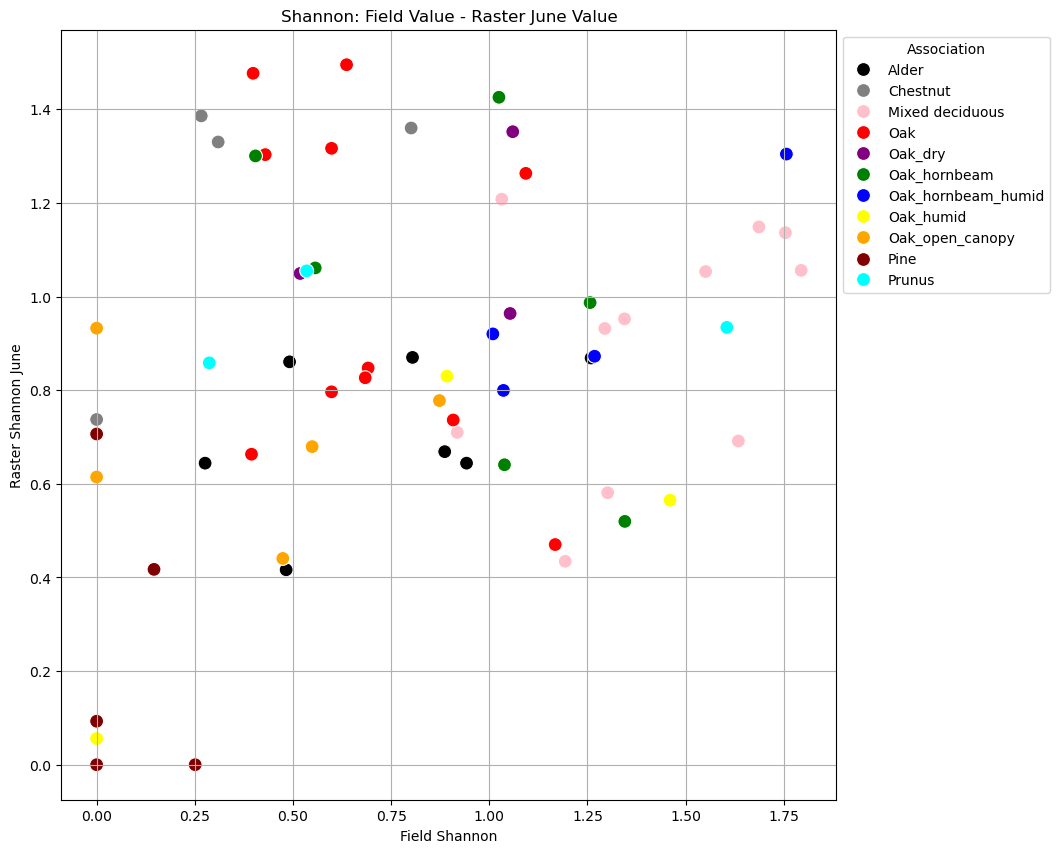

In [30]:
fig, ax1 = plt.subplots(figsize = (10,10))
sns.scatterplot(x = 'Field Shannon',y = 'Raster Shannon June', data = df_Shannon_1_Asso, hue = 'Association', 
                palette=['Black','Grey','Pink','Red','Purple','Green','Blue','Yellow','Orange','Maroon','Aqua'],
                s=100, ax = ax1)
sns.move_legend(ax1,'upper left',bbox_to_anchor= (1,1))
ax1.grid()
plt.title('Shannon: Field Value - Raster June Value')
plt.show()

In [31]:
# Null hypothesis! 
t_stat, pvalue = ttest_ind(df_Shannon_1_Asso_NoZero['Field Shannon'], df_Shannon_1_Asso_NoZero['Raster Shannon June'])
print(t_stat)
print(pvalue)
if pvalue < 0.05:
    print("We reject NULL HYPOTHESIS! Therefore we can conclude that there is a definite relationship between Field Shannon Index and Raster Shannon Index!")
else: 
    print("We fail to reject NULL HYPOTHESIS!")
# Pearson Coefficient
pear = stats.pearsonr(df_Shannon_1_Asso_NoZero['Field Shannon'], df_Shannon_1_Asso_NoZero['Raster Shannon June'])
print("The Pearson correlation coefficient is equal to " + str(pear.statistic) + "; the p value is " + str(pear.pvalue))
if pear.pvalue <= 0.05:
    print("Perfect! The Pearson correlation coefficient is considered statistically significant!")
else:
    print("Indecisive! The Pearson correlation coefficient is not considered statistically significant!")

0.02959312607084562
0.976446164549215
We fail to reject NULL HYPOTHESIS!
The Pearson correlation coefficient is equal to 0.05435484253567871; the p value is 0.6934784123557385
Indecisive! The Pearson correlation coefficient is not considered statistically significant!


In [32]:
r2_score(df_Shannon_1['Field Shannon'], df_Shannon_1['Raster Shannon June'])

-0.08175025615746656

In [33]:
mae(df_Shannon_1['Field Shannon'], df_Shannon_1['Raster Shannon June'])

0.44096351987028415

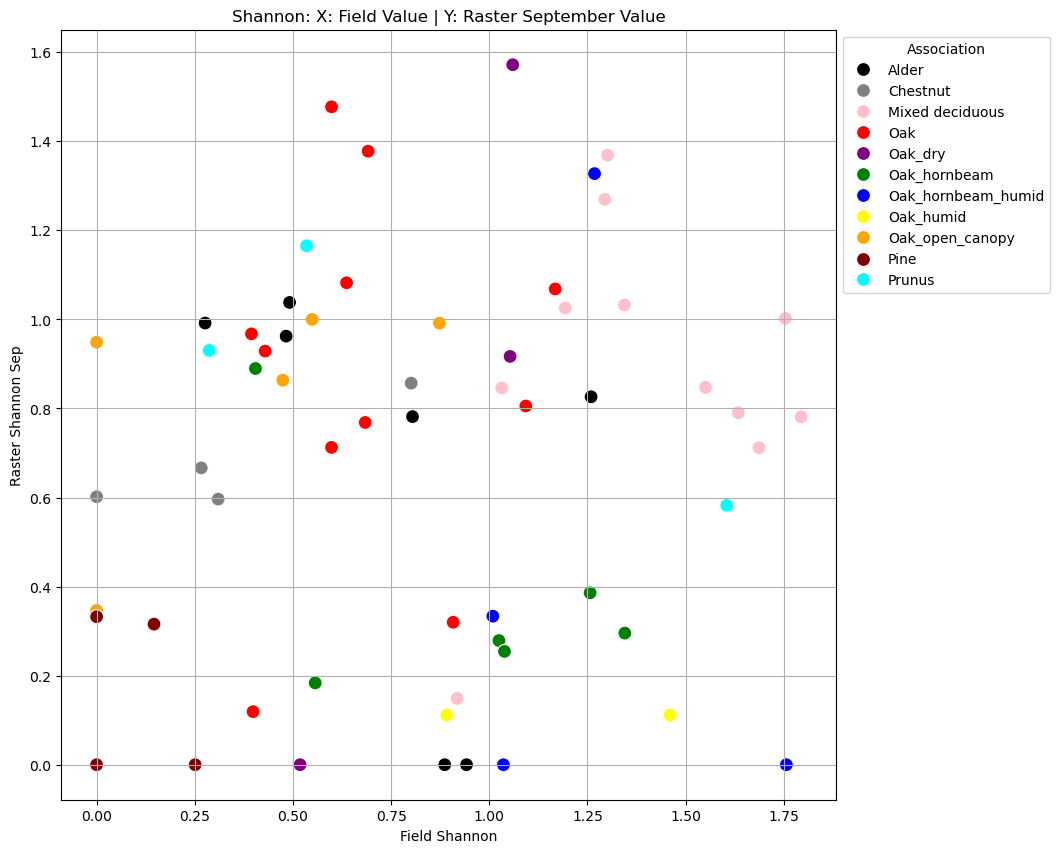

In [34]:
fig, ax1 = plt.subplots(figsize = (10,10))
sns.scatterplot(x = 'Field Shannon',y = 'Raster Shannon Sep', data = df_Shannon_1_Asso, hue = 'Association', 
                palette=['Black','Grey','Pink','Red','Purple','Green','Blue','Yellow','Orange','Maroon','Aqua'],
                s=100, ax = ax1)
sns.move_legend(ax1,'upper left',bbox_to_anchor= (1,1))
ax1.grid()
plt.title('Shannon: X: Field Value | Y: Raster September Value')
plt.show()

In [35]:
# Null hypothesis! 
t_stat, pvalue = ttest_ind(df_Shannon_1_Asso_NoZero['Field Shannon'], df_Shannon_1_Asso_NoZero['Raster Shannon Sep'])
print(t_stat)
print(pvalue)
if pvalue < 0.05:
    print("We reject NULL HYPOTHESIS! Therefore we can conclude that there is a definite relationship between Field Shannon Index and Raster Shannon Index!")
else: 
    print("We fail to reject NULL HYPOTHESIS!")
# Pearson Coefficient
pear = stats.pearsonr(df_Shannon_1_Asso_NoZero['Field Shannon'], df_Shannon_1_Asso_NoZero['Raster Shannon Sep'])
print("The Pearson correlation coefficient is equal to " + str(pear.statistic) + "; the p value is " + str(pear.pvalue))
if pear.pvalue <= 0.05:
    print("Perfect! The Pearson correlation coefficient is considered statistically significant!")
else:
    print("Indecisive! The Pearson correlation coefficient is not considered statistically significant!")

2.437282818320297
0.016431111465136955
We reject NULL HYPOTHESIS! Therefore we can conclude that there is a definite relationship between Field Shannon Index and Raster Shannon Index!
The Pearson correlation coefficient is equal to 0.0023869395384308115; the p value is 0.9862009259437484
Indecisive! The Pearson correlation coefficient is not considered statistically significant!


In [36]:
r2_score(df_Shannon_1['Field Shannon'], df_Shannon_1['Raster Shannon Sep'])

-0.4943824262108065

In [37]:
mae(df_Shannon_1['Field Shannon'], df_Shannon_1['Raster Shannon Sep'])

0.5103971083629001